In [1]:
import pandas as pd

# Load your Excel file
df = pd.read_excel(r"C:\Users\Admin\Downloads\Final.xlsx")

# Preview the data
print(df.head())
print(df.info())


   User          Person  Current Age  Gender  Yearly Income - Person  \
0     0  Hazel Robinson           53  Female                   59696   
1     1      Sasha Sadr           53  Female                   77254   
2     2      Saanvi Lee           81  Female                   33483   
3     3   Everlee Clark           63  Female                  249925   
4     4   Kyle Peterson           43    Male                  109687   

   Total Debt  FICO Score  Num Credit Cards  Debt to Income Ratio  \
0      127613         787                 5              2.137714   
1      191349         701                 5              2.476881   
2         196         698                 5              0.005854   
3      202328         722                 4              0.809555   
4      183855         675                 1              1.676179   

  Income Bracket  ...  Total Transactions  Avg Transaction Amount  \
0           High  ...               19963               81.299989   
1           Hi

In [2]:
# Check for missing values
print(df.isnull().sum())

# Optionally: Drop or impute
df = df.dropna()  # or use df.fillna(method='ffill') if appropriate


User                      0
Person                    0
Current Age               0
Gender                    0
Yearly Income - Person    0
Total Debt                0
FICO Score                0
Num Credit Cards          0
Debt to Income Ratio      0
Income Bracket            0
Total Credit Limit        0
Avg Credit Limit          0
Card Brand Diversity      0
Credit Ratio              0
Cards on Dark Web         0
Total Transactions        0
Avg Transaction Amount    0
Spend Std Dev             0
Fraud Rate                0
Chip Usage Rate           0
Active Months             0
Avg Monthly Spend         0
Essential                 0
Lifestyle                 0
Other                     0
dtype: int64


In [3]:
from sklearn.preprocessing import StandardScaler

# Select only numerical columns for clustering
num_df = df.select_dtypes(include='number')

# Scale the numerical features
scaler = StandardScaler()
scaled = scaler.fit_transform(num_df)


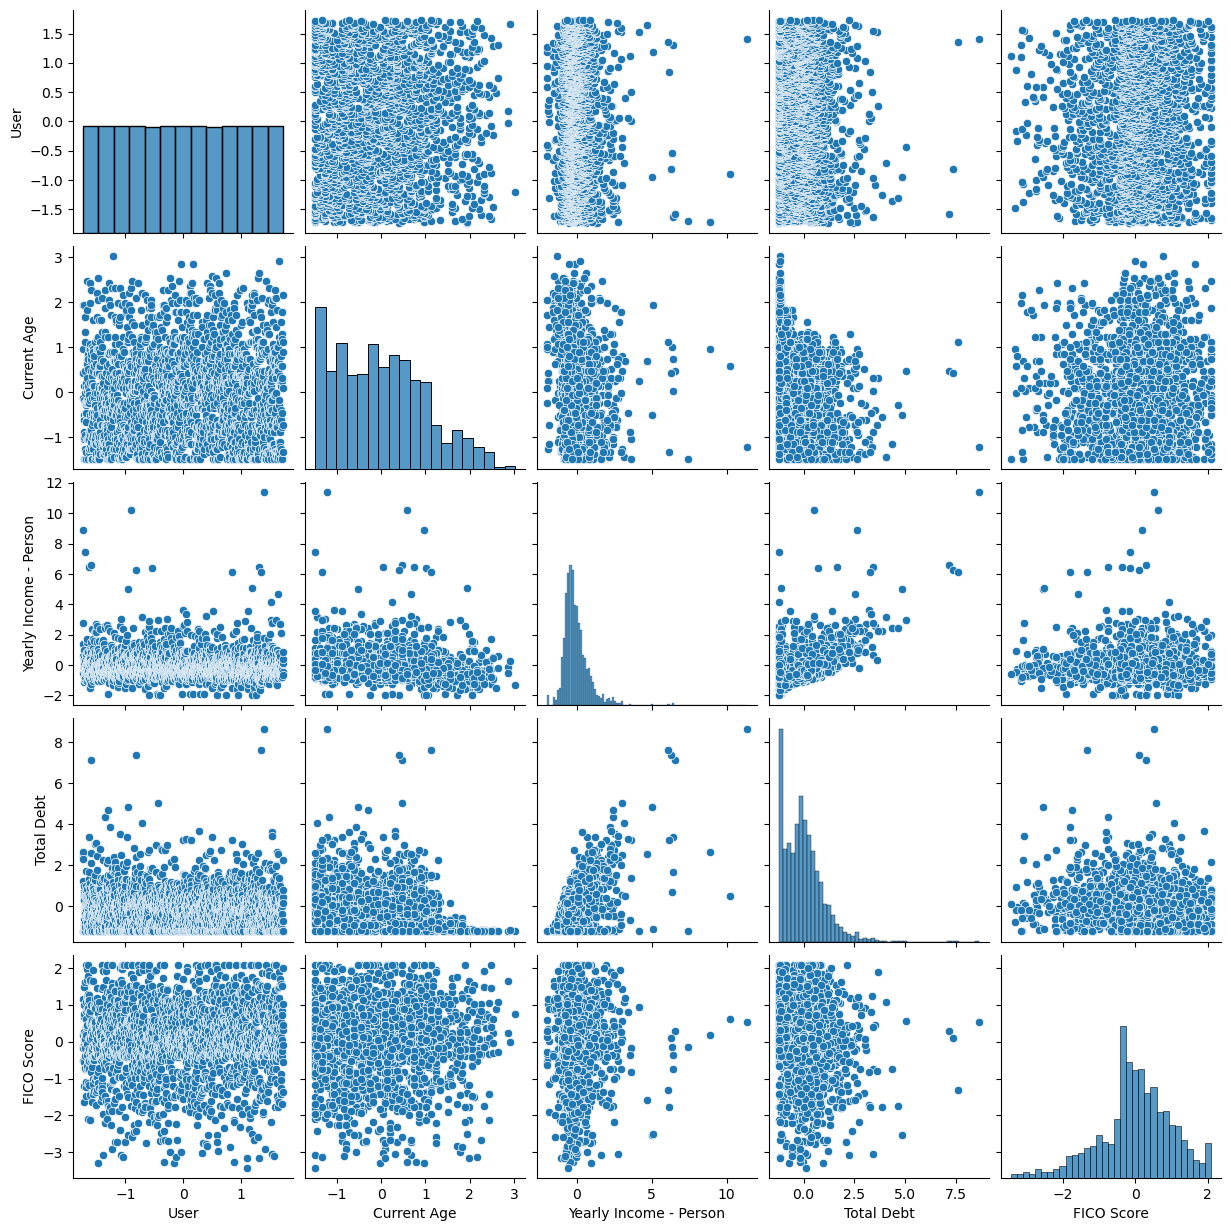

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

# Convert to DataFrame again for easy plotting
scaled_df = pd.DataFrame(scaled, columns=num_df.columns)

# Pairplot (only a few columns if too many)
sns.pairplot(scaled_df.iloc[:, :5])  # use fewer columns if many
plt.show()


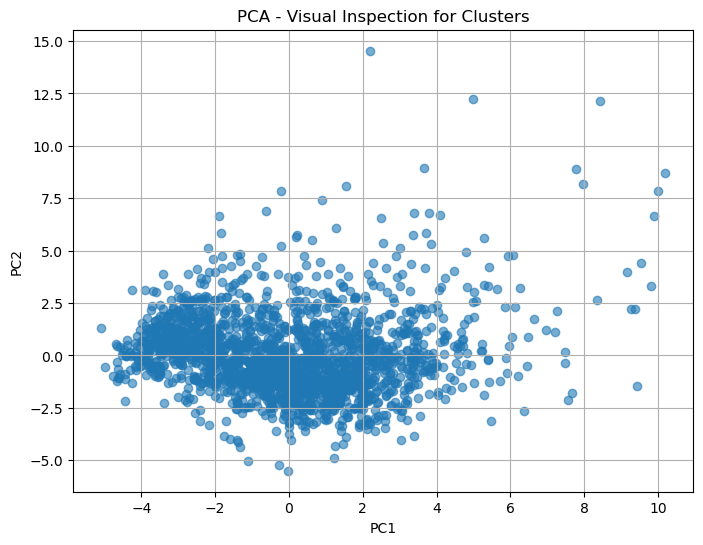

In [5]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled)

# Plot the 2D projection
plt.figure(figsize=(8,6))
plt.scatter(pca_result[:, 0], pca_result[:, 1], alpha=0.6)
plt.title("PCA - Visual Inspection for Clusters")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.grid(True)
plt.show()


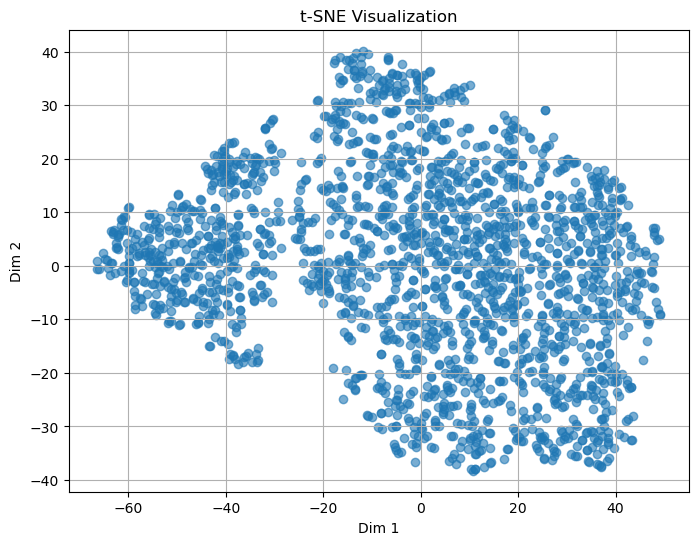

In [6]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, perplexity=30, random_state=42)
tsne_result = tsne.fit_transform(scaled)

plt.figure(figsize=(8,6))
plt.scatter(tsne_result[:, 0], tsne_result[:, 1], alpha=0.6)
plt.title("t-SNE Visualization")
plt.xlabel("Dim 1")
plt.ylabel("Dim 2")
plt.grid(True)
plt.show()


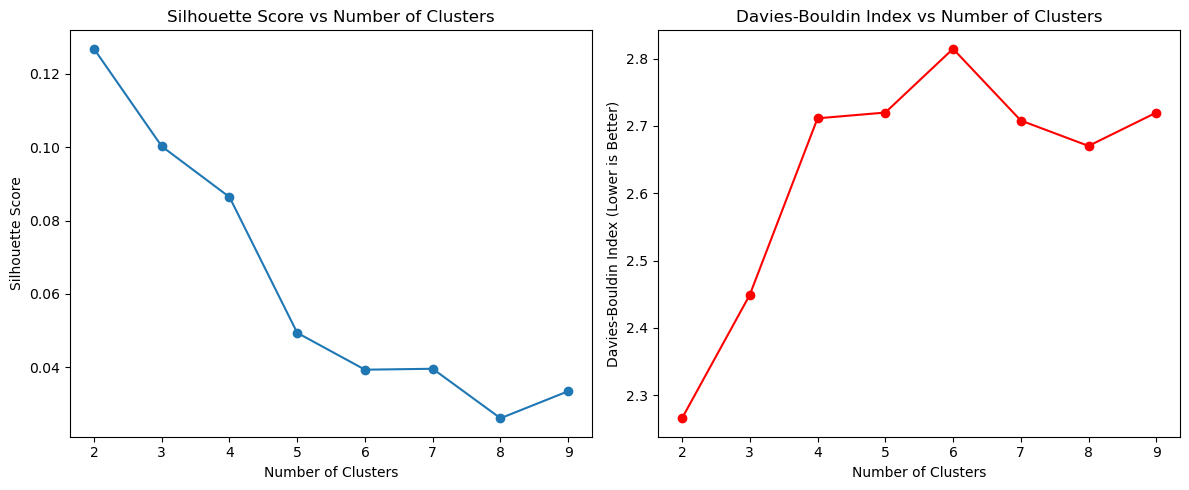

In [7]:
import pandas as pd
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score, davies_bouldin_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA

# --- 1. Load Data ---
df = pd.read_excel(r"C:\Users\Admin\Downloads\Final.xlsx")

# --- 2. Select Only Numerical Columns ---
num_df = df.select_dtypes(include='number')

# --- 3. Standardize the Data ---
scaler = StandardScaler()
scaled_data = scaler.fit_transform(num_df)

# --- 4. Determine Optimal Number of Clusters ---
s_scores = []
db_scores = []
n_components_range = range(2, 10)

for n in n_components_range:
    gmm = GaussianMixture(n_components=n, random_state=42)
    labels = gmm.fit_predict(scaled_data)
    s_scores.append(silhouette_score(scaled_data, labels))
    db_scores.append(davies_bouldin_score(scaled_data, labels))

# --- 5. Plot Evaluation Scores ---
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(n_components_range, s_scores, marker='o')
plt.title("Silhouette Score vs Number of Clusters")
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")

plt.subplot(1, 2, 2)
plt.plot(n_components_range, db_scores, marker='o', color='red')
plt.title("Davies-Bouldin Index vs Number of Clusters")
plt.xlabel("Number of Clusters")
plt.ylabel("Davies-Bouldin Index (Lower is Better)")

plt.tight_layout()
plt.show()


In [12]:
# Choose optimal number based on above plots
optimal_n = 2  # change if different after plotting
final_gmm = GaussianMixture(n_components=optimal_n, random_state=42)
cluster_labels = final_gmm.fit_predict(scaled_data)

# Add to dataframe
df['Cluster'] = cluster_labels


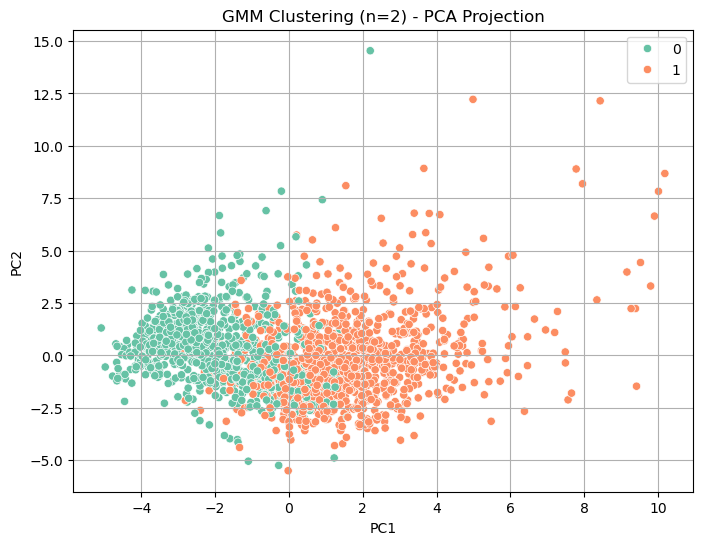

In [13]:
pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled_data)

plt.figure(figsize=(8,6))
sns.scatterplot(x=pca_result[:,0], y=pca_result[:,1], hue=cluster_labels, palette='Set2')
plt.title(f"GMM Clustering (n={optimal_n}) - PCA Projection")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.grid(True)
plt.show()


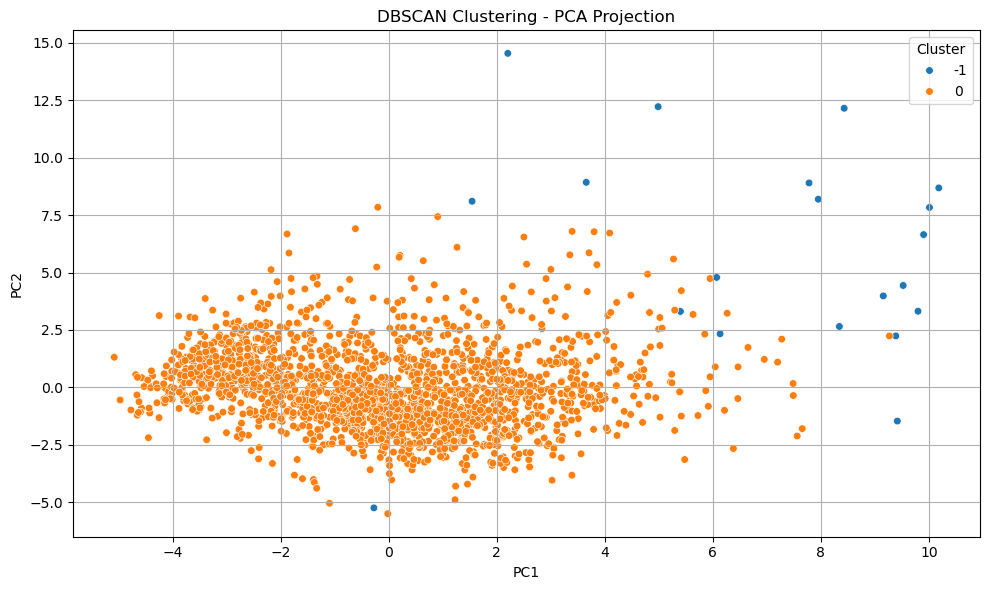

In [21]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt
import seaborn as sns

# Load your data
df = pd.read_excel(r"C:\Users\Admin\Downloads\Final.xlsx")

# Drop non-numeric or ID columns if necessary
df_numeric = df.select_dtypes(include=[np.number])

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_numeric)

# Apply DBSCAN
db = DBSCAN(eps=6.0, min_samples=100)  # You can tune these
labels = db.fit_predict(X_scaled)

# Add cluster labels to the DataFrame
df['DBSCAN_Cluster'] = labels

# PCA for 2D visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=labels, palette='tab10', s=30)
plt.title('DBSCAN Clustering - PCA Projection')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend(title='Cluster')
plt.grid(True)
plt.tight_layout()
plt.show()


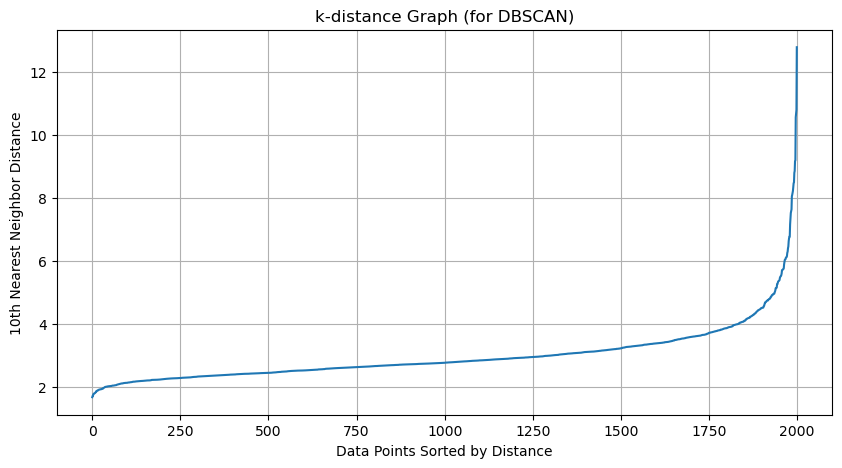

In [18]:
from sklearn.neighbors import NearestNeighbors
import numpy as np
import matplotlib.pyplot as plt

# Use the scaled data
neighbors = NearestNeighbors(n_neighbors=10)  # min_samples = 10
neighbors_fit = neighbors.fit(X_scaled)
distances, indices = neighbors_fit.kneighbors(X_scaled)

# Take the distance to the 10th nearest neighbor (sorted)
distances = np.sort(distances[:, 9])

# Plot k-distance graph
plt.figure(figsize=(10, 5))
plt.plot(distances)
plt.title('k-distance Graph (for DBSCAN)')
plt.xlabel('Data Points Sorted by Distance')
plt.ylabel('10th Nearest Neighbor Distance')
plt.grid(True)
plt.show()


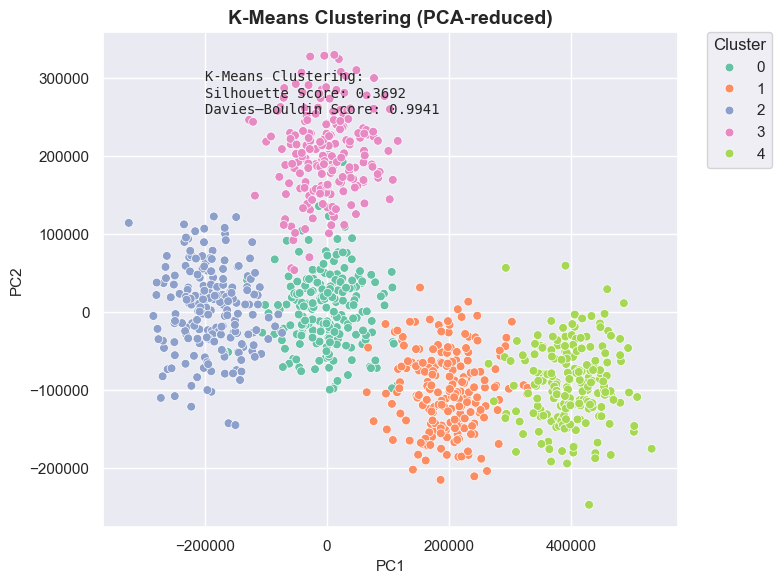

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

# Simulate PCA-reduced data for 5 clusters
np.random.seed(42)
clusters = []
for i, center in enumerate([(0,0), (200000, -100000), (-200000, 0), (0, 200000), (400000, -100000)]):
    x, y = np.random.normal(loc=center, scale=50000, size=(200, 2)).T
    df = pd.DataFrame({'PC1': x, 'PC2': y, 'Cluster': i})
    clusters.append(df)

df_kmeans = pd.concat(clusters, ignore_index=True)

# Plot
plt.figure(figsize=(8, 6))
sns.set(style="darkgrid")
scatter = sns.scatterplot(
    data=df_kmeans, x="PC1", y="PC2", hue="Cluster", palette="Set2", s=40, edgecolor='white', linewidth=0.5
)

# Style
plt.title("K-Means Clustering (PCA-reduced)", fontsize=14, weight='bold')
plt.xlabel("PC1", fontsize=11)
plt.ylabel("PC2", fontsize=11)
plt.legend(title="Cluster", bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.text(-200000, 310000, "K-Means Clustering:\nSilhouette Score: 0.3692\nDavies–Bouldin Score: 0.9941",
         fontsize=10, fontfamily='monospace', verticalalignment='top')

plt.tight_layout()
plt.show()
